# ESTIMANDO O CONSUMO DE ENERGIA - REGRESSÃO LINEAR <h1>

## 📊 Contexto do Problema

Este projeto utiliza uma base de dados com **medições históricas de consumo de energia** de uma indústria, coletadas em **intervalos regulares de tempo**.  
Os dados são provenientes de **sensores instalados no ambiente industrial e no sistema produtivo**, registrando tanto variáveis operacionais quanto condições ambientais.

O **objetivo principal** é desenvolver um **modelo de regressão** capaz de **prever o consumo de energia** a partir dessas leituras de sensores, apoiando:
- Análises de **eficiência energética**  
- **Planejamento da produção**  
- **Tomada de decisão operacional**

---

## 🏭 Descrição do Contexto

A indústria monitora continuamente o consumo total de energia e diferentes grandezas físicas associadas ao processo produtivo.  
Essas informações permitem compreender **como o consumo energético varia ao longo do tempo**, em função:
- Do nível de produção  
- Das condições ambientais  
- Das características operacionais do sistema  

A partir dessas variáveis explicativas, espera-se estimar o consumo de energia em **novas situações de operação**, ainda não observadas.

---

## 🗂️ Estrutura da Base de Dados

A base de dados é composta por:

- **Variável alvo (*target*)**  
  - Consumo de energia em cada instante (em kWh)

- **Variáveis explicativas (*features*)**, obtidas por sensores, incluindo:
  - **Atividade produtiva**  
    - Velocidade de máquinas  
    - Taxa ou nível de produção  
  - **Condições ambientais**  
    - Temperatura  
    - Umidade  
  - **Condições operacionais**  
    - Pressão em linhas de processo  
    - Horários de operação  
    - Dia da semana  
  - **Sensores auxiliares**, que podem ou não apresentar relação direta com o consumo energético

Todas as variáveis numéricas e categóricas associadas às leituras dos sensores podem ser utilizadas como **preditoras** no modelo de regressão.

# PASSO 1: 📚 IMPORTAÇÃO DAS BIBLIOTECAS
A seguir estão descritas as bibliotecas empregadas no desenvolvimento do **modelo de regressão linear para estimativa do consumo de energia**, bem como a função de cada uma no fluxo do projeto.

---

## 🔧 Manipulação de Dados

### `pandas`
Responsável pela **leitura, organização e manipulação da base de dados** por meio de DataFrames.  
É utilizada para:
- Carregar arquivos (CSV, Excel, etc.)
- Tratar valores ausentes
- Selecionar e transformar variáveis
- Preparar os dados para a modelagem

### `numpy`
Fornece suporte a **operações matemáticas e numéricas eficientes**, sendo amplamente utilizada em:
- Cálculos vetorizados
- Manipulação de arrays
- Apoio a operações internas das bibliotecas de modelagem

---

## 📊 Visualização de Dados

### `matplotlib.pyplot`
Biblioteca base para **criação de gráficos**.  
É usada para:
- Visualizar distribuições
- Analisar relações entre variáveis
- Avaliar resíduos e comportamento do modelo

### `seaborn`
Construída sobre o matplotlib, permite **visualizações estatísticas mais sofisticadas e intuitivas**, como:
- Gráficos de correlação
- Boxplots
- Gráficos de dispersão com regressão

---

## 🤖 Modelagem e Avaliação

### `train_test_split` (scikit-learn)
Utilizada para **dividir a base de dados** em conjuntos de treino e teste, garantindo:
- Avaliação justa do modelo
- Redução de overfitting

### `StandardScaler` (scikit-learn)
Responsável pela **normalização das variáveis numéricas**, colocando-as na mesma escala.  
Isso é importante para:
- Melhor estabilidade numérica
- Interpretação mais consistente dos coeficientes

### `LinearRegression` (scikit-learn)
Implementa o **modelo de regressão linear**, que aprende a relação entre as variáveis explicativas e o consumo de energia, permitindo:
- Estimar o consumo energético
- Analisar a influência de cada variável no modelo

### Métricas de Avaliação (`scikit-learn`)
- **`r2_score`**: mede o quanto o modelo explica da variabilidade do consumo de energia  
- **`mean_squared_error (MSE)`**: penaliza erros maiores, avaliando a precisão do modelo  
- **`mean_absolute_error (MAE)`**: mede o erro médio absoluto de forma mais interpretável

---

## ⚠️ Análise de Multicolinearidade

### `statsmodels.api`
Utilizada para análises estatísticas mais detalhadas do modelo, como:
- Ajuste alternativo do modelo de regressão
- Avaliação estatística dos coeficientes

### `variance_inflation_factor (VIF)`
Empregada para **detectar multicolinearidade entre as variáveis explicativas**, indicando:
- Redundância entre sensores
- Possíveis problemas na interpretação dos coeficientes da regressão

---

Essas bibliotecas, em conjunto, permitem **explorar, modelar, avaliar e interpretar** o consumo de energia de forma estruturada e confiável.

In [1]:
# Manipulação de dados
import pandas as pd                          # Dataframes e análise de dados
import numpy as np                           # Operações numéricas

# Visualização
import matplotlib.pyplot as plt              # Gráficos
import seaborn as sns                        # Visualizações estatísticas

# Modelagem e métricas
from sklearn.model_selection import train_test_split # Divisão
from sklearn.preprocessing import StandardScaler  # Normalização de dados
from sklearn.linear_model import LinearRegression  # Modelo de regressão
from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error)  # Métricas

# Multicolinearidade
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Avisos
import warnings
warnings.filterwarnings('ignore') # Para não aparacer avisos desnecessários

## 📥 PASSO 2 — Leitura, Inspeção e Organização da Base de Dados

Neste passo é realizada a **leitura da base de dados a partir de um arquivo CSV**, seguida de uma análise inicial para compreender a estrutura, o conteúdo e a qualidade das informações disponíveis.

As atividades deste passo incluem:
- Carregamento dos dados e validação da leitura;
- Inspeção das dimensões do conjunto de dados;
- Análise dos tipos de variáveis e seus formatos;
- Visualização de registros iniciais e finais;
- Cálculo de estatísticas descritivas;
- Ajustes de formatação e padronização dos valores numéricos;
- Avaliação e tratamento de variáveis temporais;
- Verificação de registros duplicados.

Essas etapas são essenciais para garantir que a base esteja **consistente, compreensível e adequada** para as fases seguintes de **exploração, pré-processamento e modelagem**.

---


In [2]:
df = pd.read_csv("dados_consumo_energia.csv") # Transformando em um Dataframe

### 2.1 Primeiras e Últimas Observações da Base de Dados
Análise dos registros iniciais e finais para compreender a organização e o conteúdo das variáveis.


In [3]:
display(df.head(2)) # 25 primeiras linhas
print("\n")
display(df.tail(2)) # 25 últimas linhas

,Data_Hora,Consumo_Energia_kWh,Temperatura_Ambiente_C,Umidade_Ar_Percent,Hora_Dia,Dia_Semana,Velocidade_Producao_RPM,Pressao_Sistema_Bar,Sensor_Ruido_1,Sensor_Ruido_2,Sensor_Redundante,Sensor_Tempo_Ruido,Sensor_Constante
0,2024-01-01 00:00:00,760.638196,28.973713,80.990332,0,0,398.723259,40.921924,-0.863494,-0.423760,38.693762,3.925925,49.996697
1,2024-01-01 01:00:00,823.158327,23.893886,73.869505,1,0,478.322199,51.396150,-0.031203,-0.453414,50.134288,-7.888405,49.949635


,Data_Hora,Consumo_Energia_kWh,Temperatura_Ambiente_C,Umidade_Ar_Percent,Hora_Dia,Dia_Semana,Velocidade_Producao_RPM,Pressao_Sistema_Bar,Sensor_Ruido_1,Sensor_Ruido_2,Sensor_Redundante,Sensor_Tempo_Ruido,Sensor_Constante
998,2024-02-11 14:00:00,877.350713,20.430568,57.553996,14,6,550.126463,76.433782,0.808036,0.467950,76.423568,22.264565,49.931501
999,2024-02-11 15:00:00,812.230391,29.580662,48.826460,15,6,476.711143,63.606479,-0.848066,-1.170281,64.404006,25.388888,50.080118


### Observação sobre a última data da Coluna Data_Hora
- Importante notar aqui, que temos 41 dias completos (registro de 00h00 as 23h00).
- E no dia 11/02/24 contém apenas 16 informações, ou seja, falta 8 informações de registro para o dia completo.
- Porém, vale destacar que, como o consumo é em kWh, não há problema. Dessa forma, manteremos as informações.

### 2.2 Informações Gerais da Base de Dados
Verificação da quantidade de registros, nomes das variáveis e tipos de dados associados a cada coluna.


In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data_Hora                1000 non-null   str    
 1   Consumo_Energia_kWh      1000 non-null   float64
 2   Temperatura_Ambiente_C   1000 non-null   float64
 3   Umidade_Ar_Percent       1000 non-null   float64
 4   Hora_Dia                 1000 non-null   int64  
 5   Dia_Semana               1000 non-null   int64  
 6   Velocidade_Producao_RPM  1000 non-null   float64
 7   Pressao_Sistema_Bar      1000 non-null   float64
 8   Sensor_Ruido_1           1000 non-null   float64
 9   Sensor_Ruido_2           1000 non-null   float64
 10  Sensor_Redundante        1000 non-null   float64
 11  Sensor_Tempo_Ruido       1000 non-null   float64
 12  Sensor_Constante         1000 non-null   float64
dtypes: float64(10), int64(2), str(1)
memory usage: 101.7 KB


### 2.3 Estatística Descritiva
Cálculo de medidas estatísticas básicas para compreender o comportamento das variáveis numéricas.


In [5]:
display(df.describe()) # Resumo

,Consumo_Energia_kWh,Temperatura_Ambiente_C,Umidade_Ar_Percent,Hora_Dia,Dia_Semana,Velocidade_Producao_RPM,Pressao_Sistema_Bar,Sensor_Ruido_1,Sensor_Ruido_2,Sensor_Redundante,Sensor_Tempo_Ruido,Sensor_Constante
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,828.651318,25.154656,61.062544,11.436000,2.976000,500.875132,59.812808,-0.049274,-0.046738,59.756495,11.532085,50.001834
std,122.607280,7.833728,14.961816,6.913009,1.990826,147.518142,10.271325,0.992380,1.007389,10.496862,8.806242,0.101169
min,455.775299,-0.930139,15.894170,0.000000,0.000000,47.073177,30.705513,-3.176704,-2.899514,27.692463,-13.005426,49.616334
25%,742.770525,19.819278,50.906375,5.000000,1.000000,402.800058,52.625795,-0.682605,-0.693693,52.231399,4.966324,49.936315
50%,832.870085,25.202405,60.946157,11.000000,3.000000,499.962385,60.001846,-0.018242,-0.042827,59.882588,11.176962,50.001912
75%,910.720023,30.183551,70.933233,17.000000,5.000000,599.137297,66.669454,0.639123,0.612447,66.820945,18.030019,50.067720
max,1317.033545,55.821852,107.896614,23.000000,6.000000,1088.935656,92.430930,3.112910,3.098299,94.527729,34.994115,50.337738


### 2.4 Padronização dos Valores Numéricos
Ajuste da exibição dos valores numéricos para três casas decimais, facilitando a leitura e a interpretação dos resultados.


In [6]:
pd.set_option("display.float_format", "{:.3f}".format)

### 2.5 Análise da Variável Temporal (*Data_Hora*)
A variável **Data_Hora** representa informações de data e hora (*timestamp*). Inicialmente identificada como *dtype = object*, ela é transformada para o formato *datetime* a fim de permitir:
- Extração de informações temporais relevantes;
- Análise do período total observado (dias completos).

> **Observação:** A informação referente ao tempo em horas já está representada na variável **Hora_Dia**, não sendo necessária nova extração dessa unidade.



In [7]:
# transformando a variavel Data_Hora em datetime
df['Data_Hora'] = pd.to_datetime(df['Data_Hora'])

# Criando coluna auxiliar
df['Data'] = df['Data_Hora'].dt.date

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Data_Hora                1000 non-null   datetime64[us]
 1   Consumo_Energia_kWh      1000 non-null   float64       
 2   Temperatura_Ambiente_C   1000 non-null   float64       
 3   Umidade_Ar_Percent       1000 non-null   float64       
 4   Hora_Dia                 1000 non-null   int64         
 5   Dia_Semana               1000 non-null   int64         
 6   Velocidade_Producao_RPM  1000 non-null   float64       
 7   Pressao_Sistema_Bar      1000 non-null   float64       
 8   Sensor_Ruido_1           1000 non-null   float64       
 9   Sensor_Ruido_2           1000 non-null   float64       
 10  Sensor_Redundante        1000 non-null   float64       
 11  Sensor_Tempo_Ruido       1000 non-null   float64       
 12  Sensor_Constante         1000 non-null   float

### 2.6 Verificação de Registros Duplicados
Identificação de possíveis duplicidades na base de dados, garantindo a integridade das informações.

In [8]:
# Conta quantas linhas estão duplicadas no DataFrame
duplicados = df.duplicated().sum()
print(f"Duplicados: {duplicados}")

# Verifica se existem duplicatas
if duplicados > 0:
    print("Existem linhas duplicadas! Considere removê-las.") # Alerta sobre a presença de linhas duplicadas
    print("Exemplo:")
    print(df[df.duplicated(keep=False)].head()) # Exibe exemplos das linhas duplicadas (originais e cópias)
else:
    print("Nenhum duplicado encontrado!") # Caso não existam duplicatas

Duplicados: 0
Nenhum duplicado encontrado!


## 🔍 PASSO 3 — Exploração dos Dados e Tratamentos

Neste passo é realizada a **análise exploratória dos dados (EDA)** e a aplicação de **tratamentos estatísticos** com o objetivo de compreender o comportamento do consumo de energia, identificar padrões, detectar outliers e preparar as variáveis para a etapa de modelagem.

As análises combinam **visualizações gráficas, estatísticas descritivas e transformações nos dados**, garantindo maior robustez e interpretabilidade do modelo de regressão.

---

### 3.1 Definição da Variável Alvo
A variável **Consumo de Energia (kWh)** é definida como a **variável alvo** do problema, ou seja, aquela que o modelo de regressão deverá estimar a partir das demais variáveis explicativas.

---

In [9]:
variavel_alvo = "Consumo_Energia_kWh"  # definindo a Variável Alvo

### 3.2 Histograma da Variável Alvo
Construção do histograma do consumo de energia com o objetivo de:
- Analisar a distribuição dos valores;
- Identificar assimetrias, dispersão e possíveis outliers;
- Obter uma visão inicial do comportamento da variável resposta.

---

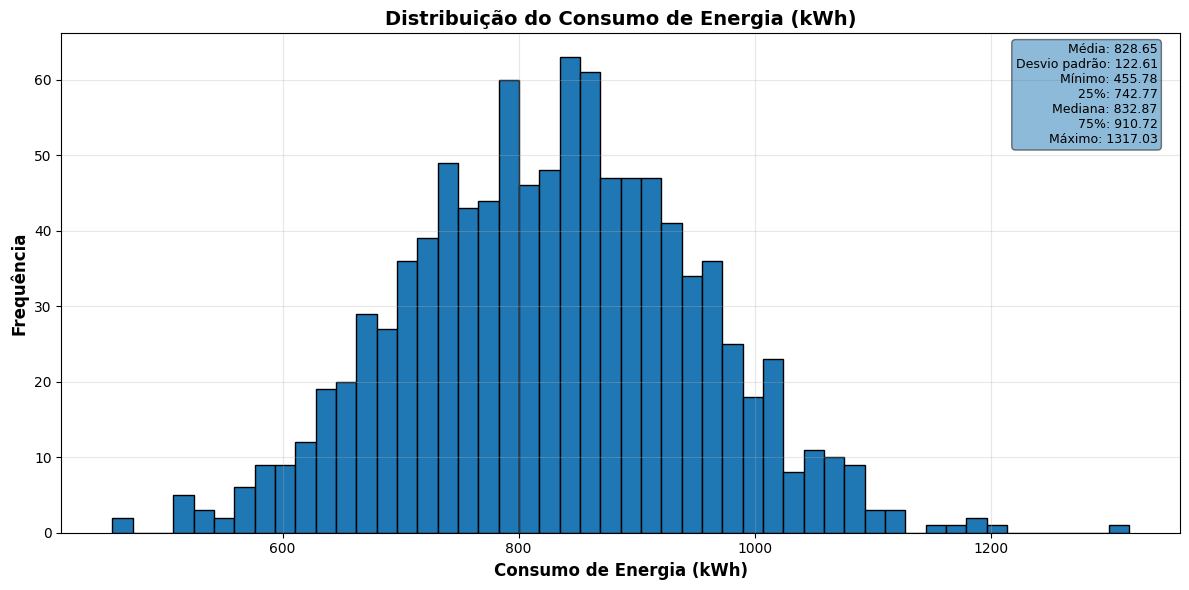

In [10]:
# Estatísticas descritivas
stats = df[variavel_alvo].describe()

texto_stats = (
    f"Média: {stats['mean']:.2f}\n"
    f"Desvio padrão: {stats['std']:.2f}\n"
    f"Mínimo: {stats['min']:.2f}\n"
    f"25%: {stats['25%']:.2f}\n"
    f"Mediana: {stats['50%']:.2f}\n"
    f"75%: {stats['75%']:.2f}\n"
    f"Máximo: {stats['max']:.2f}"
)

plt.figure(figsize=(12, 6))
plt.hist(df[variavel_alvo], bins=50, edgecolor="k")
plt.xlabel("Consumo de Energia (kWh)", fontsize=12, fontweight='bold')
plt.ylabel("Frequência", fontsize=12, fontweight='bold')
plt.title("Distribuição do Consumo de Energia (kWh)", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Caixa de estatísticas (lado direito)
plt.text(
    0.98, 0.98, texto_stats,
    transform=plt.gca().transAxes,
    fontsize=9,
    verticalalignment='top',
    horizontalalignment='right',
    bbox=dict(boxstyle="round", alpha=0.5)
)

plt.tight_layout()
plt.show()


### Discussão:

- A variável Consumo de Energia (kWh) apresenta distribuição aproximadamente normal, com **média** e **mediana** muito próximas (828,6 e 832,8), **variabilidade moderada** e **poucos valores extremos** aparentes no histograma.


- Para avaliar com mais precisão a presença de *outliers* e decidir se será necessário removê‑los, capá‑los ou mantê‑los, será construído um *boxplo*t específico dessa variável na sequência.

### 3.3 Análise Temporal do Consumo de Energia
Exploração da relação entre a variável **Data_Hora** e o consumo de energia por meio de um **gráfico temporal da média diária** do consumo (42 pontos).

**Objetivo:**  
- Identificar tendências ao longo dos dias;
- Observar padrões de variação temporal do consumo energético.

---

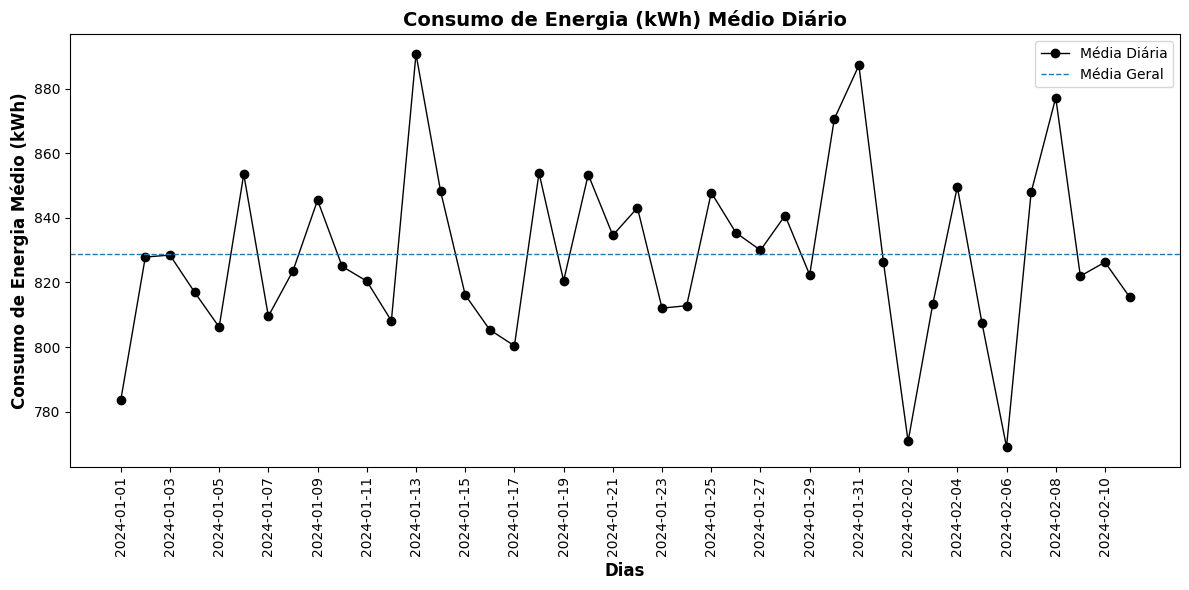

In [11]:
media_diaria = df.groupby("Data")[variavel_alvo].mean() # pegando a média de cada dia
media_geral = df[variavel_alvo].mean() # média geral

plt.figure(figsize=(12, 6))
plt.plot(media_diaria.index, media_diaria.values, marker='o', linewidth=1, color ="k", label='Média Diária')
plt.axhline(media_geral, linestyle='--', linewidth=1, label='Média Geral')
plt.xlabel("Dias", fontsize=12, fontweight='bold')
plt.ylabel("Consumo de Energia Médio (kWh)", fontsize=12, fontweight='bold')
plt.title("Consumo de Energia (kWh) Médio Diário", fontsize=14, fontweight='bold')
plt.xticks(media_diaria.index[::2], rotation=90) # para deixar todas a data e a data "verticalmente"
plt.legend()
plt.tight_layout()
plt.show()


### 3.4 Boxplot do Consumo de Energia por Dia
Cada boxplot representa as medições de consumo de energia ao longo de um dia:
- Em geral, **24 medições por dia**;
- Exceção para o dia **11/02**, que possui **16 medições**.

Os dados são agrupados por dia, permitindo:
- Comparar a distribuição intradiária do consumo;
- Avaliar variações e dispersões ao longo do período analisado.

---

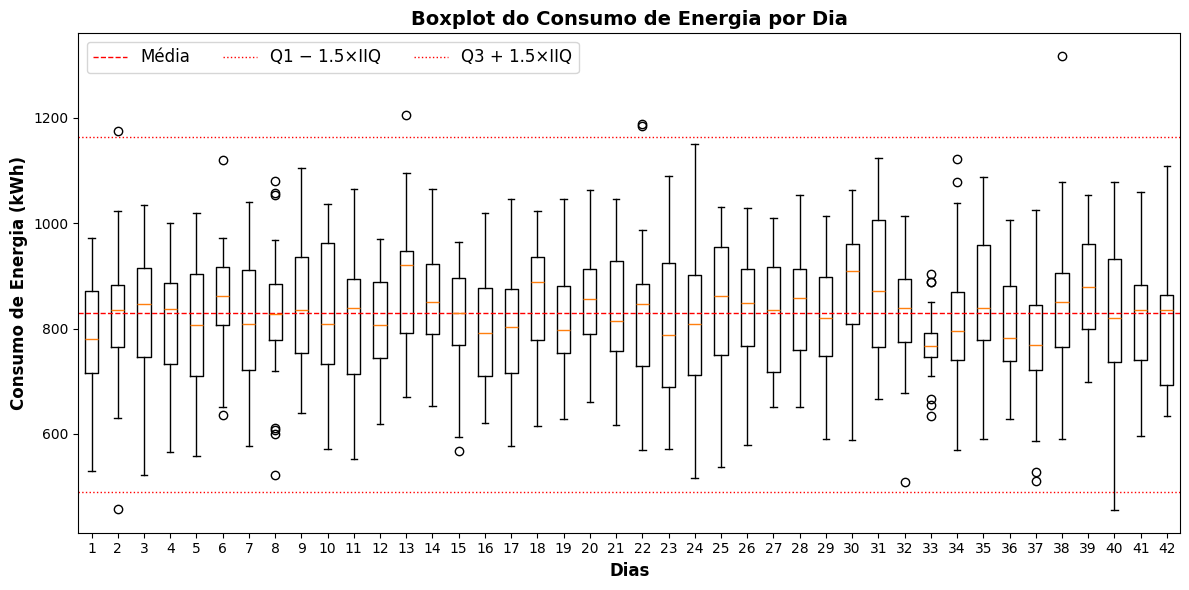

In [12]:
# Agrupando para gerar um boxplot por dia 
dados_boxplot = [
    grupo[variavel_alvo].values
    for _, grupo in df.groupby('Data')
]

analise_descritiva_alvo = df[variavel_alvo].describe()
media = analise_descritiva_alvo["mean"]
q1 = analise_descritiva_alvo["25%"]
q3 = analise_descritiva_alvo["75%"]
std = analise_descritiva_alvo["std"]

#Intervalo Interquartil
iiq = q3 - q1
limite_inf = q1 - 1.5 * iiq
limite_sup = q3 + 1.5 * iiq


plt.figure(figsize=(12, 6))
plt.boxplot(dados_boxplot) # opção showfliers=True/False para mostrar ou não os outliers

# Linhas horizontais
plt.axhline(media, linestyle='--', linewidth=1, color = "red", label='Média')
plt.axhline(limite_inf, linestyle=':', linewidth=1, color = "red", label='Q1 − 1.5×IIQ')
plt.axhline(limite_sup, linestyle=':', linewidth=1, color = "red", label='Q3 + 1.5×IIQ')

plt.xlabel("Dias", fontsize=12, fontweight='bold')
plt.ylabel("Consumo de Energia (kWh)", fontsize=12, fontweight='bold')
plt.title("Boxplot do Consumo de Energia por Dia", fontsize=14, fontweight='bold')
plt.legend(fontsize=12, ncol=3)
plt.tight_layout()
plt.show()

### Discussão:

Os *outliers* do Consumo de Energia por dia são poucos e, pelo *boxplot*, não parecem **erros grotescos**, e sim **picos operacionais** típicos e plausíveis, como dias com maior produção, o que indica que, não há necessidade de removê‑los ou substituí-los.

### 3.5 Boxplot de Todas as Variáveis
Visualização conjunta das variáveis numéricas por meio de boxplots, com o objetivo de:
- Identificar valores extremos;
- Comparar escalas e dispersões;
- Apoiar decisões de tratamento de outliers.

---

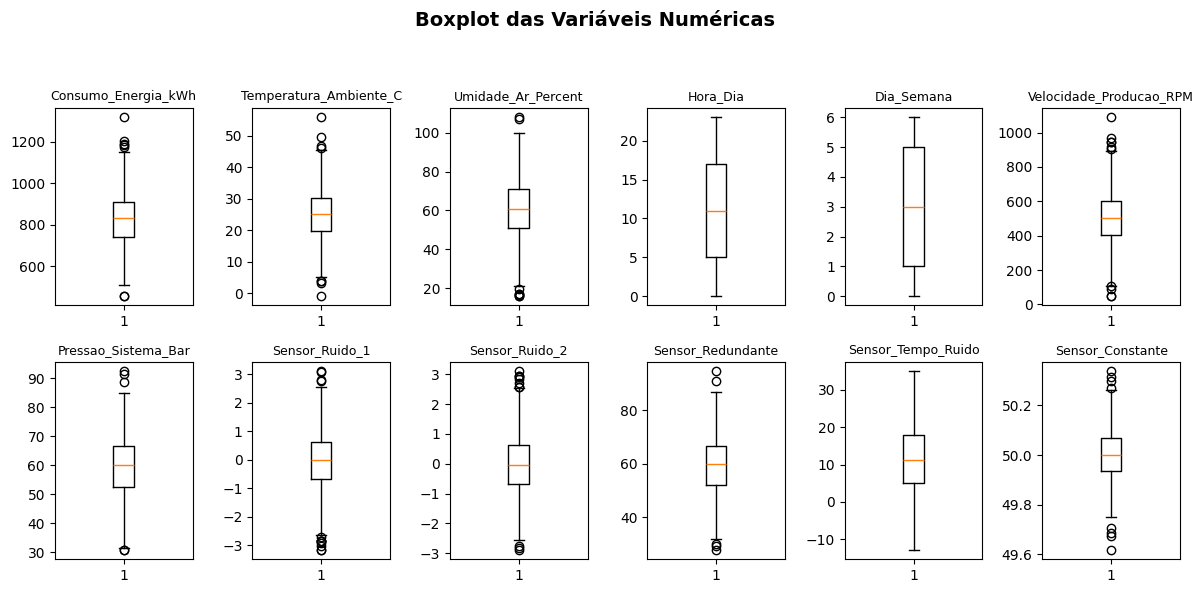

In [13]:
variaveis = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(2, 6, figsize=(12, 6))
axes = axes.flatten()

for i, var in enumerate(variaveis):
    axes[i].boxplot(df[var], vert=True)  # vert=True é o padrão, só para explicitar
    axes[i].set_title(var, fontsize=9)

fig.suptitle("Boxplot das Variáveis Numéricas", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

### Discussão

Nesse boxplot, observam‑se variáveis com outliers mais extremos, especialmente nas medições de sensores e variáveis de processo.

Por isso, serão aplicados limites (*capping*) às seguintes variáveis: 

- Temperatura_Ambiente_C
- Umidade_Ar_Percent
- Velocidade_Producao_RPM
- Pressao_Sistema_Bar
- Sensor_Ruido_1
- Sensor_Ruido_2
- Sensor_Redundante
- Sensor_Tempo_Ruido

De forma a reduzir a influência desses valores extremos na regressão.

### 3.6 *Capping* das Variáveis
Aplicação da técnica de *capping*, que consiste em **limitar valores extremos** das variáveis numéricas:
- Valores abaixo do **1º percentil** são substituídos pelo próprio 1º percentil;
- Valores acima do **99º percentil** são substituídos pelo 99º percentil.

**Vantagens do *capping*:**
- Reduz a influência de outliers extremos sem removê-los;
- Preserva o tamanho da amostra e a estrutura dos dados;
- Mantém o comportamento típico das variáveis, evitando distorções no modelo.

---

In [14]:
#  Variáveis para capar
colunas_capar = [
    'Temperatura_Ambiente_C',
    'Umidade_Ar_Percent',
    'Velocidade_Producao_RPM',
    'Pressao_Sistema_Bar',
    'Sensor_Ruido_1',
    'Sensor_Ruido_2',
    'Sensor_Redundante',
    'Sensor_Tempo_Ruido'
]

#  Calcula limites por quantil (ajuste 0,01 / 0,99)
q_low  = df[colunas_capar].quantile(0.01)   # limite inferior = 1%
q_high = df[colunas_capar].quantile(0.99)   # limite superior = 99%

# Cria uma cópia e aplica o capping
df_capado = df.copy()
df_capado[colunas_capar] = df_capado[colunas_capar].clip(lower=q_low, upper=q_high, axis=1)

### 3.7 Boxplot Após o *Capping*
Reavaliação das distribuições das variáveis após o tratamento de valores extremos, permitindo comparar o efeito do *capping* sobre os dados.

---

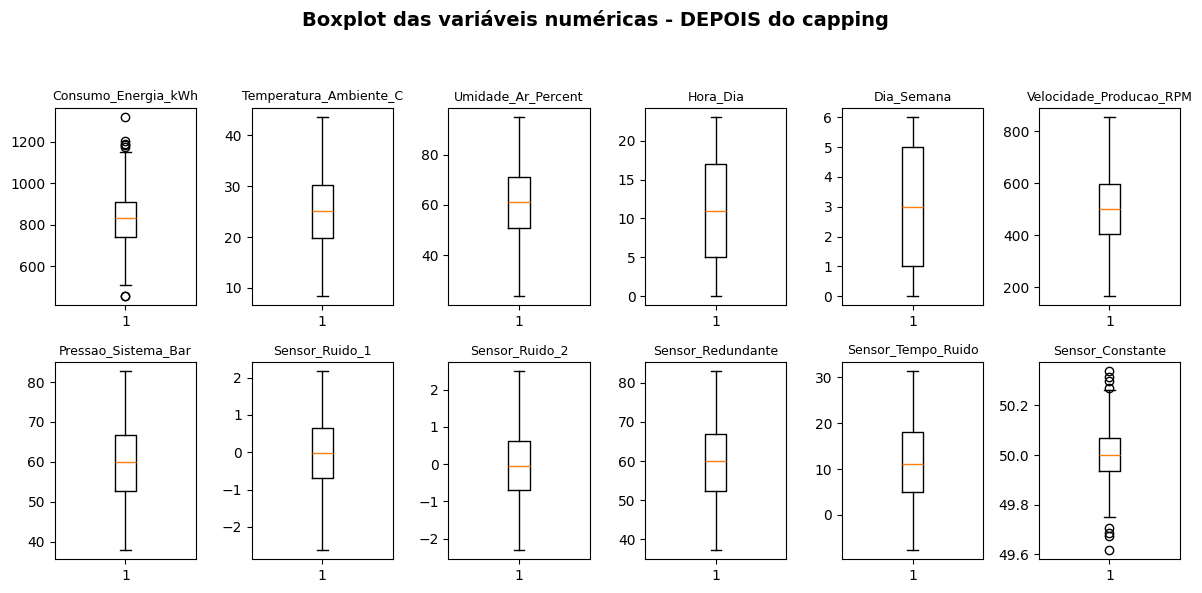

In [15]:
fig, axes = plt.subplots(2, 6, figsize=(12, 6))
axes = axes.flatten()

for i, col in enumerate(variaveis):
    axes[i].boxplot(df_capado[col], vert=True)
    axes[i].set_title(col, fontsize=9)

fig.suptitle("Boxplot das variáveis numéricas - DEPOIS do capping",
             fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

### 3.8 Remoção das Variáveis Temporais Originais (*Data_Hora* e *Data*)
As variáveis **Data_Hora** e **Data** foram utilizadas exclusivamente para fins de exploração e análise temporal.  
Após essa etapa, elas são removidas por não serem utilizadas diretamente no modelo de regressão.

---


In [16]:
for base in [df, df_capado]:
    if "Data" in base.columns:
        base.drop(columns=["Data_Hora","Data"], inplace=True)

df_capado.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Consumo_Energia_kWh      1000 non-null   float64
 1   Temperatura_Ambiente_C   1000 non-null   float64
 2   Umidade_Ar_Percent       1000 non-null   float64
 3   Hora_Dia                 1000 non-null   int64  
 4   Dia_Semana               1000 non-null   int64  
 5   Velocidade_Producao_RPM  1000 non-null   float64
 6   Pressao_Sistema_Bar      1000 non-null   float64
 7   Sensor_Ruido_1           1000 non-null   float64
 8   Sensor_Ruido_2           1000 non-null   float64
 9   Sensor_Redundante        1000 non-null   float64
 10  Sensor_Tempo_Ruido       1000 non-null   float64
 11  Sensor_Constante         1000 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 93.9 KB


### 3.9 Matriz de Correlação
Construção da matriz de correlação com os seguintes objetivos:
- Identificar relações lineares entre as variáveis explicativas e a variável alvo **Consumo_Energia_kWh**;
- Detectar possíveis casos de **multicolinearidade** entre os preditores.

---


Correlação com o consumo de energia:
Consumo_Energia_kWh        1.000
Velocidade_Producao_RPM    0.964
Temperatura_Ambiente_C     0.179
Pressao_Sistema_Bar        0.131
Sensor_Redundante          0.122
Umidade_Ar_Percent         0.122
Dia_Semana                 0.045
Sensor_Ruido_1             0.034
Hora_Dia                   0.011
Sensor_Ruido_2             0.007
Sensor_Constante          -0.002
Sensor_Tempo_Ruido        -0.007
Name: Consumo_Energia_kWh, dtype: float64


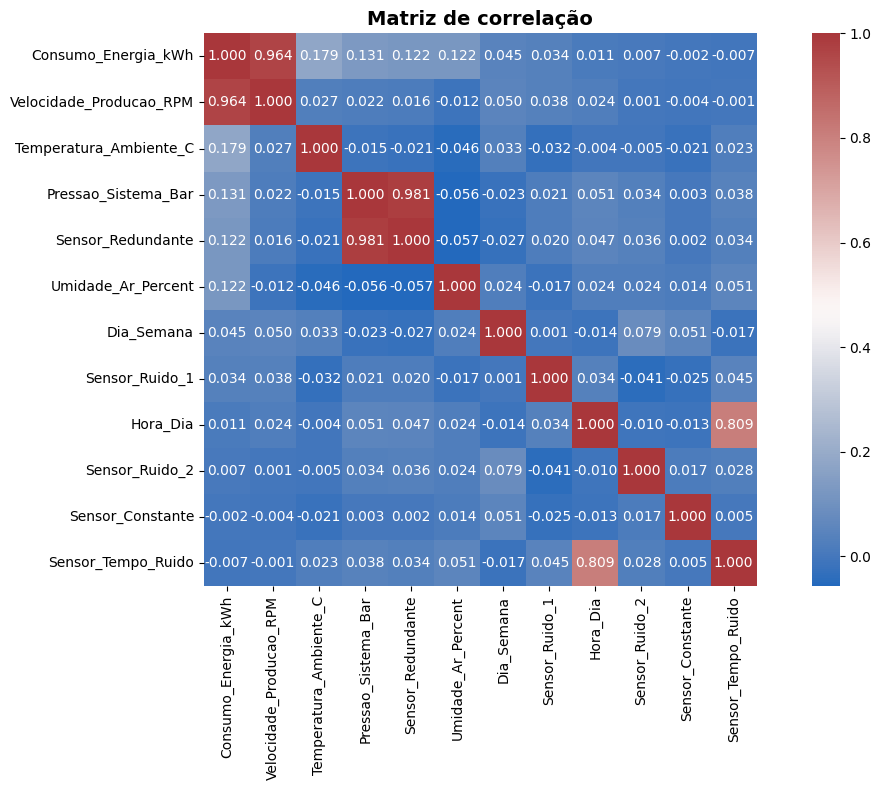

In [17]:
# Seleciona apenas variáveis numéricas da base capada
df_numeric = df_capado.select_dtypes(include="number")

# Matriz de correlação
corr = df_numeric.corr()

# Correlação com a variável alvo
corr_target = corr[variavel_alvo].sort_values(ascending=False)

print("\nCorrelação com o consumo de energia:")
print(corr_target)

# Selecionar as variáveis mais correlacionadas com o alvo
top_feats = corr_target.index[:12]

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric[top_feats].corr(),
            annot=True, fmt=".3f", cmap="vlag", square=True)
plt.title("Matriz de correlação", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


#### Discussão da Matriz de Correlação

Observa-se que a variável **Velocidade_Producao_RPM** apresenta uma correlação linear muito forte com o consumo de energia (0,964), indicando que o consumo energético está fortemente associado ao regime operacional do sistema. Esse resultado é coerente do ponto de vista físico e industrial, uma vez que maiores velocidades de produção demandam maior potência elétrica.

As variáveis ambientais, como **Temperatura_Ambiente_C**, **Pressao_Sistema_Bar** e **Umidade_Ar_Percent**, apresentam correlações positivas, porém de baixa magnitude (menores que 0,20). Isso sugere que, embora possam influenciar o consumo energético, seu impacto é secundário quando comparado às variáveis operacionais.

As variáveis temporais (**Hora_Dia** e **Dia_Semana**) exibem correlações muito próximas de zero, indicando ausência de relação linear direta com o consumo de energia. Esse comportamento sugere que o consumo não depende significativamente do horário ou do dia da semana, mas sim das condições operacionais do processo produtivo.

Os sensores associados a ruído operacional apresentaram correlações desprezíveis com o consumo energético, indicando baixo poder explicativo para o fenômeno em estudo.

No que se refere à correlação entre variáveis explicativas, destaca-se a correlação extremamente elevada entre **Pressao_Sistema_Bar** e **Sensor_Redundante** (0,981), caracterizando um caso claro de multicolinearidade. Essa redundância indica que ambas as variáveis fornecem informações muito semelhantes, o que pode comprometer a estabilidade e a interpretação dos coeficientes em um modelo de regressão linear.

E com base nesses resultados, torna-se necessária a aplicação de técnicas adicionais, como o cálculo do **Fator de Inflação da Variância (VIF)**, para apoiar a seleção final das variáveis do modelo.


### 3.10 Ajuste das Variáveis Temporais Cíclicas (*Hora_Dia* e *Dia_Semana*)
As variáveis **Hora_Dia** e **Dia_Semana** possuem natureza **cíclica**, pois seus valores se repetem periodicamente:
- 24 horas em um dia;
- 7 dias em uma semana.

Para preservar essa periodicidade, são aplicadas transformações **seno e cosseno**, representando cada variável em um espaço bidimensional contínuo.

Uma variável temporal cíclica \( x \), com período \( T \), é transformada da seguinte forma:


$$x_{\sin} = \sin\left(\frac{2\pi x}{T}\right)
\quad \text{e} \quad
x_{\cos} = \cos\left(\frac{2\pi x}{T}\right)$$


Essa abordagem evita descontinuidades artificiais (por exemplo, entre 23h e 0h) e melhora o desempenho do modelo.

---

In [18]:
# Hora do dia (0–23)
df_capado["Hora_sin"] = np.sin(2 * np.pi * df_capado["Hora_Dia"] / 24)
df_capado["Hora_cos"] = np.cos(2 * np.pi * df_capado["Hora_Dia"] / 24)

# Dia da semana (0–6, domingo a sábado)
df_capado["Dia_sin"] = np.sin(2 * np.pi * df_capado["Dia_Semana"] / 7)
df_capado["Dia_cos"] = np.cos(2 * np.pi * df_capado["Dia_Semana"] / 7)

# Remove colunas originais (evita redundância)
df_capado = df_capado.drop(columns=["Hora_Dia", "Dia_Semana"])

### 3.11 Aplicação do Fator de Inflação de Variância — *VIF*
O **Variance Inflation Factor (VIF)** é utilizado para detectar **multicolinearidade** entre as variáveis explicativas.

**Interpretação dos valores de VIF:**
- **VIF ≈ 1**: praticamente sem multicolinearidade;
- **1 < VIF < 5**: baixo nível, geralmente aceitável;
- **5 ≤ VIF < 10**: atenção, possível redundância entre variáveis;
- **VIF ≥ 10**: multicolinearidade elevada, recomendando-se a remoção ou combinação de variáveis.

In [19]:
# Remove a variável resposta e mantém apenas colunas numéricas
X = (df_capado.drop(columns=["Consumo_Energia_kWh"]).select_dtypes(include=["number"]).dropna())

# Adiciona constante (intercepto)
X_const = sm.add_constant(X)

# Calcula o VIF
vif_df = pd.DataFrame()
vif_df["Variavel"] = X_const.columns

vif_df["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

# Remove constante e ordena
vif_df = (
    vif_df[vif_df["Variavel"] != "const"]
    .sort_values(by="VIF", ascending=False)
    .reset_index(drop=True)
)
vif_df # Exibe o resultado

,Variavel,VIF
0,Pressao_Sistema_Bar,26.203
1,Sensor_Redundante,26.197
2,Sensor_Tempo_Ruido,1.685
3,Hora_sin,1.669
4,Hora_cos,1.018
5,Umidade_Ar_Percent,1.012
6,Sensor_Ruido_2,1.012
7,Sensor_Constante,1.009
8,Sensor_Ruido_1,1.008
9,Dia_sin,1.008


### Discussão

- Os resultados do VIF mostram um caso claro de multicolinearidade grave entre as variáveis Pressão do Sistema e Sensor Redundante, ambas com VIF acima de 26, muito acima do limite usualmente aceitável (5–10). Isso indica que as duas carregam informação praticamente redundante, o que compromete a estabilidade e a interpretação dos coeficientes do modelo de regressão.

- Diante disso, é necessário manter apenas uma dessas variáveis no modelo, eliminando a outra para remover a multicolinearidade sem perder poder explicativo relevante. 

- A opção adotada é remover o Sensor Redundante e manter Pressão do Sistema, por se tratar de um sensor redundante da própria pressão do sistema.

In [20]:
# Remove a variável resposta e mantém apenas colunas numéricas
X = X.drop(columns=["Sensor_Redundante"])

# Recalcula o VIF sem a variavel Sensor_Redundante
X_const = sm.add_constant(X)
vif_df = pd.DataFrame()
vif_df["Variavel"] = X_const.columns
vif_df["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

# Remove constante e ordena
vif_df = (
    vif_df[vif_df["Variavel"] != "const"]
    .sort_values(by="VIF", ascending=False)
    .reset_index(drop=True)
)
vif_df # Exibe o resultado

,Variavel,VIF
0,Sensor_Tempo_Ruido,1.685
1,Hora_sin,1.668
2,Hora_cos,1.018
3,Umidade_Ar_Percent,1.012
4,Sensor_Ruido_2,1.012
5,Pressao_Sistema_Bar,1.011
6,Sensor_Constante,1.009
7,Sensor_Ruido_1,1.008
8,Dia_sin,1.007
9,Temperatura_Ambiente_C,1.006


### Discussão:

- Todas as variáveis apresentam VIF próximos de 1, com valor máximo de 1,68.

- Isso indica ausência de multicolinearidade relevante entre as variáveis explicativas.

In [21]:
df_ajustado = df_capado.drop(columns=["Sensor_Redundante"])
df_ajustado.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Consumo_Energia_kWh      1000 non-null   float64
 1   Temperatura_Ambiente_C   1000 non-null   float64
 2   Umidade_Ar_Percent       1000 non-null   float64
 3   Velocidade_Producao_RPM  1000 non-null   float64
 4   Pressao_Sistema_Bar      1000 non-null   float64
 5   Sensor_Ruido_1           1000 non-null   float64
 6   Sensor_Ruido_2           1000 non-null   float64
 7   Sensor_Tempo_Ruido       1000 non-null   float64
 8   Sensor_Constante         1000 non-null   float64
 9   Hora_sin                 1000 non-null   float64
 10  Hora_cos                 1000 non-null   float64
 11  Dia_sin                  1000 non-null   float64
 12  Dia_cos                  1000 non-null   float64
dtypes: float64(13)
memory usage: 101.7 KB


## 🧩 PASSO 4 — Preparação dos Dados e Ajuste para Treino do Modelo

Neste passo, os dados já explorados e tratados são **organizados e preparados para a etapa de modelagem**, garantindo que o processo de treino e avaliação do modelo de regressão linear seja realizado de forma correta e sem vazamento de informação.

---

### 4.1 Divisão dos Dados em Treino e Teste
Os dados são separados em dois subconjuntos:
- **Conjunto de treino (80%)**, utilizado para ajustar o modelo de regressão linear;
- **Conjunto de teste (20%)**, utilizado para avaliar o desempenho do modelo em dados não vistos.

Essa divisão permite analisar a **capacidade de generalização** do modelo.

---

In [22]:
X = df_ajustado.drop(columns=[variavel_alvo]).select_dtypes(include="number")
y = df_ajustado[variavel_alvo]

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

print("Tamanho treino:", X_treino.shape, "| Tamanho teste:", X_teste.shape)

Tamanho treino: (800, 12) | Tamanho teste: (200, 12)


### 4.2 Padronização das Variáveis Numéricas
As variáveis explicativas numéricas são padronizadas utilizando a técnica de **padronização estatística**, que transforma os dados para:
- **Média igual a 0**
- **Desvio padrão igual a 1**

#### 🔧 Ferramenta Utilizada — *StandardScaler*
O *StandardScaler* é uma ferramenta de pré-processamento que:
- Remove a média das variáveis;
- Escala os dados para variância unitária;
- Evita que variáveis em escalas maiores dominem o ajuste do modelo.

#### 📌 Procedimento Adotado
- O *scaler* é ajustado **apenas nos dados de treino**, utilizando o método `fit_transform()`;
- Os dados de teste são transformados separadamente com o método `transform()`, garantindo o uso dos mesmos parâmetros de escala e evitando **vazamento de dados** (*data leakage*).

#### ⚠️ Observação Importante
- O *StandardScaler* retorna um **array NumPy**, que não contém nomes de colunas nem índices;
- Para facilitar análises posteriores (junção de tabelas, inspeção de variáveis e visualizações), os dados padronizados são convertidos novamente para **DataFrame**, preservando rótulos e estrutura dos dados.

---

In [23]:
scaler = StandardScaler()
X_treino_padronizado = scaler.fit_transform(X_treino)
X_teste_padronizado = scaler.transform(X_teste)

# Volta para DataFrame (mantém nomes das variáveis)
X_treino_padronizado = pd.DataFrame(X_treino_padronizado, columns = X_treino.columns, index = X_treino.index)
X_teste_padronizado = pd.DataFrame(X_teste_padronizado, columns = X_teste.columns, index = X_teste.index)

## 📈 PASSO 5 — Modelo de Regressão Linear

Neste passo é realizado o **ajuste do modelo de regressão linear**, utilizando os dados previamente preparados, padronizados e divididos em treino e teste.  
Além do ajuste e das previsões, é feita uma **análise detalhada dos coeficientes**, permitindo interpretar a influência de cada variável explicativa sobre o consumo de energia.

---

### 5.1 Ajuste do Modelo e Geração de Previsões
O modelo de **Regressão Linear** é ajustado utilizando o conjunto de **dados de treino**, aprendendo a relação linear entre as variáveis explicativas e a variável alvo **Consumo de Energia (kWh)**.

Após o ajuste:
- O modelo é utilizado para gerar **previsões no conjunto de teste**;
- As previsões permitem avaliar como o modelo se comporta em dados não utilizados no treinamento;
- Essa etapa é fundamental para verificar a **capacidade de generalização** do modelo.

O modelo de regressão linear assume que o consumo de energia pode ser descrito como uma combinação linear das variáveis explicativas, conforme a forma geral:


$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n$$


onde:
- $ \hat{y} $ representa o consumo de energia estimado;
- $ \beta_0 $ é o intercepto do modelo;
- $ \beta_i $ são os coeficientes associados às variáveis explicativas $ x_i $.

---

In [24]:
#Treino do modelo
modelo = LinearRegression()
modelo.fit(X_treino_padronizado, y_treino)

# Previsões
y_pred_treino = modelo.predict(X_treino_padronizado)
y_pred_teste = modelo.predict(X_teste_padronizado)

### 5.2 Análise dos Coeficientes do Modelo
Após o treinamento, os **coeficientes da regressão linear** são analisados para interpretar o comportamento do modelo.

Essa análise permite:
- Identificar quais variáveis possuem **maior impacto** sobre o consumo de energia;
- Avaliar o **sinal dos coeficientes**:
  - Coeficiente positivo → aumento da variável tende a aumentar o consumo;
  - Coeficiente negativo → aumento da variável tende a reduzir o consumo;
- Comparar a importância relativa das variáveis, especialmente porque os dados foram **padronizados**, tornando os coeficientes diretamente comparáveis.

A interpretação dos coeficientes fornece **insights operacionais importantes**, auxiliando:
- A compreensão dos fatores que mais influenciam o consumo energético;
- A identificação de possíveis oportunidades de **eficiência energética**;
- A validação se o comportamento aprendido pelo modelo está alinhado com o conhecimento do processo industrial.

---


Coeficientes do modelo (ordenados por |coef|):
               Variavel    Coef
Velocidade_Producao_RPM 117.147
 Temperatura_Ambiente_C  19.717
     Umidade_Ar_Percent  18.034
    Pressao_Sistema_Bar  15.370
               Hora_sin   3.297
                Dia_sin   1.110
       Sensor_Constante   0.642
     Sensor_Tempo_Ruido  -0.551
               Hora_cos  -0.428
                Dia_cos  -0.340
         Sensor_Ruido_2  -0.214
         Sensor_Ruido_1  -0.102


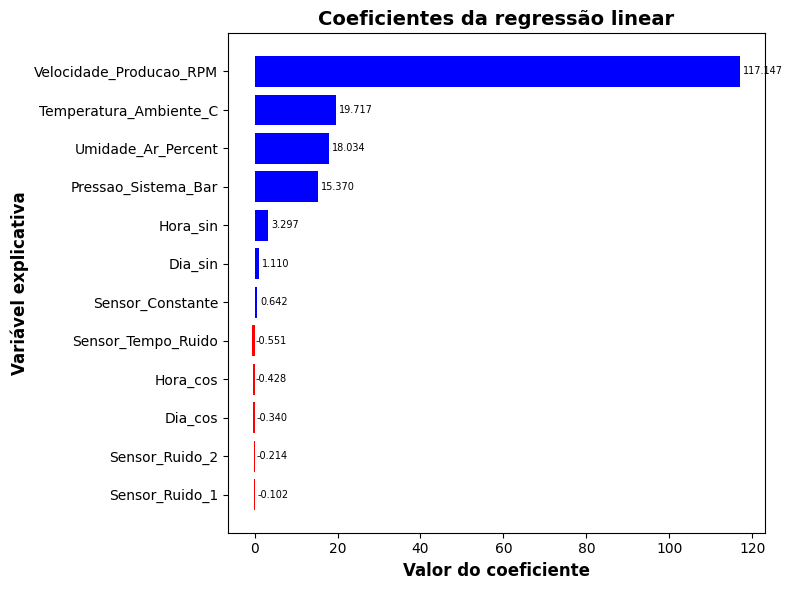

In [25]:
coef_df = pd.DataFrame({"Variavel": X_treino_padronizado.columns, "Coef": modelo.coef_})
coef_df_sorted = coef_df.sort_values(by="Coef", key=np.abs, ascending=False)

print("\nCoeficientes do modelo (ordenados por |coef|):")
print(coef_df_sorted.to_string(index=False))

plt.figure(figsize=(8, 6))
cores = ["red" if c < 0 else "blue" for c in coef_df_sorted["Coef"]]
bars = plt.barh(coef_df_sorted["Variavel"], coef_df_sorted["Coef"], color=cores)
plt.xlabel("Valor do coeficiente", fontsize=12, fontweight="bold")
plt.ylabel("Variável explicativa", fontsize=12, fontweight="bold")
plt.title("Coeficientes da regressão linear", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()

for bar in bars:
    valor = bar.get_width()
    plt.text(
        valor + 0.7,
        bar.get_y() + bar.get_height() / 2,
        f"{valor:.3f}",
        va="center",
        ha="left",
        fontsize=7,
    )
plt.tight_layout()
plt.show()

### Discussão dos Coeficientes da Regressão Linear

- Os coeficientes apresentados são padronizados, o que permite comparar diretamente a importância relativa de cada variável no modelo. As maiores **contribuições positivas** são de Velocidade de Produção (117,147), Temperatura Ambiente (19,717), Umidade do Ar (18,034) e Pressão Sistema(13,370).
​

- **Interpretação:** O coeficiente padronizado da **Velocidade de Produção** indica que variações nessa variável **exercem o maior impacto** sobre o **consumo de energia**, sendo o **principal fator explicativo do modelo**.

## 📊 PASSO 6 — Métricas e Desempenho do Modelo

Neste passo é avaliado o **desempenho do modelo de regressão linear**, utilizando métricas quantitativas e análise gráfica dos resíduos.  
O objetivo é verificar **o quão bem o modelo explica os dados**, a precisão das previsões e a existência de possíveis padrões não capturados pelo modelo.

---

### 6.1 Avaliação do Modelo em Treino e Teste
O desempenho do modelo é avaliado separadamente nos conjuntos de **treino** e **teste**, permitindo analisar:
- A capacidade de aprendizado do modelo;
- Sua **generalização para dados não vistos**;
- A presença de *overfitting* ou *underfitting*.

As métricas utilizadas são:

#### 📈 Coeficiente de Determinação — **R²**
- Indica a **proporção da variabilidade do consumo de energia explicada pelo modelo**;
- Varia entre 0 e 1:
  - **R² = 0** → o modelo não explica a variabilidade dos dados;
  - **R² = 1** → explicação perfeita;
- Valores mais elevados indicam melhor ajuste aos dados.

#### 📉 Raiz do Erro Quadrático Médio — **RMSE**
- Mede o erro médio das previsões, penalizando **erros maiores de forma mais severa**;
- Mantém a mesma unidade da variável alvo (**kWh**);
- É sensível a outliers e fornece uma noção clara da magnitude dos erros mais relevantes.

#### 📏 Erro Médio Absoluto — **MAE**
- Representa o erro médio absoluto entre valores reais e previstos;
- Também expresso em **kWh**;
- Indica, em média, **quanto o modelo erra para mais ou para menos** em cada previsão;
- É mais robusto a valores extremos quando comparado ao RMSE.

A comparação dessas métricas entre treino e teste permite avaliar a **consistência e estabilidade** do modelo.

---

In [26]:
print("\nDesempenho do Modelo:")

# ===== TREINO =====
r2_treino = r2_score(y_treino, y_pred_treino)
rmse_treino = np.sqrt(mean_squared_error(y_treino, y_pred_treino))
mae_treino = mean_absolute_error(y_treino, y_pred_treino)

print("\n--- TREINO ---")
print(f"R²   : {r2_treino:.3f}")
print(f"RMSE : {rmse_treino:.3f}")
print(f"MAE  : {mae_treino:.3f}")

# ===== TESTE =====
r2_teste = r2_score(y_teste, y_pred_teste)
rmse_teste = np.sqrt(mean_squared_error(y_teste, y_pred_teste))
mae_teste = mean_absolute_error(y_teste, y_pred_teste)

print("\n--- TESTE ---")
print(f"R²   : {r2_teste:.3f}")
print(f"RMSE : {rmse_teste:.3f}")
print(f"MAE  : {mae_teste:.3f}")


Desempenho do Modelo:

--- TREINO ---
R²   : 0.989
RMSE : 13.081
MAE  : 8.785

--- TESTE ---
R²   : 0.986
RMSE : 14.401
MAE  : 9.524


### Discussão das métricas de desempenho

- Os resultados indicam que o **modelo de regressão linear** está **capturando muito bem** a **relação entre as variáveis explicativas** e o **consumo de energia**, tanto em treino quanto em teste. 

- O **R²** de 0,989 (98,9%) no **conjunto de treino** e 0,986 (98,6%) no **conjunto de teste** mostra que cerca de **99% da variabilidade do consumo é explicada pelo modelo**, com desempenho praticamente igual nos dois conjuntos, o que sugere ausência de sobreajuste relevante.

- Os **valores de erro** também **são baixos** em relação à faixa típica do consumo: o RMSE é de aproximadamente 13,081 kWh no treino e 14,401 kWh no teste, enquanto o MAE fica em torno de 8,785 kWh e 9,524 kWh, respectivamente. Isso significa que, em média, o erro absoluto por previsão está na casa de poucos kWh, e a proximidade entre erros de treino e teste reforça que o modelo generaliza bem para novos dados dentro do mesmo padrão de operação.

### 6.2 Análise dos Resíduos — Valores Previstos vs. Reais
A análise dos resíduos é realizada por meio de um **gráfico de valores previstos versus valores reais**, com o objetivo de:
- Verificar se os erros estão distribuídos de forma aleatória;
- Identificar padrões sistemáticos não capturados pelo modelo;
- Avaliar possíveis problemas como heterocedasticidade ou viés nas previsões.

Um bom ajuste do modelo é indicado quando:
- Os pontos se concentram próximos à linha de referência (45°);
- Não há padrões claros ou tendências nos resíduos;
- Os erros parecem distribuídos de forma aproximadamente aleatória.

Essa análise gráfica complementa as métricas numéricas e fornece uma **avaliação visual da qualidade das previsões**.

---

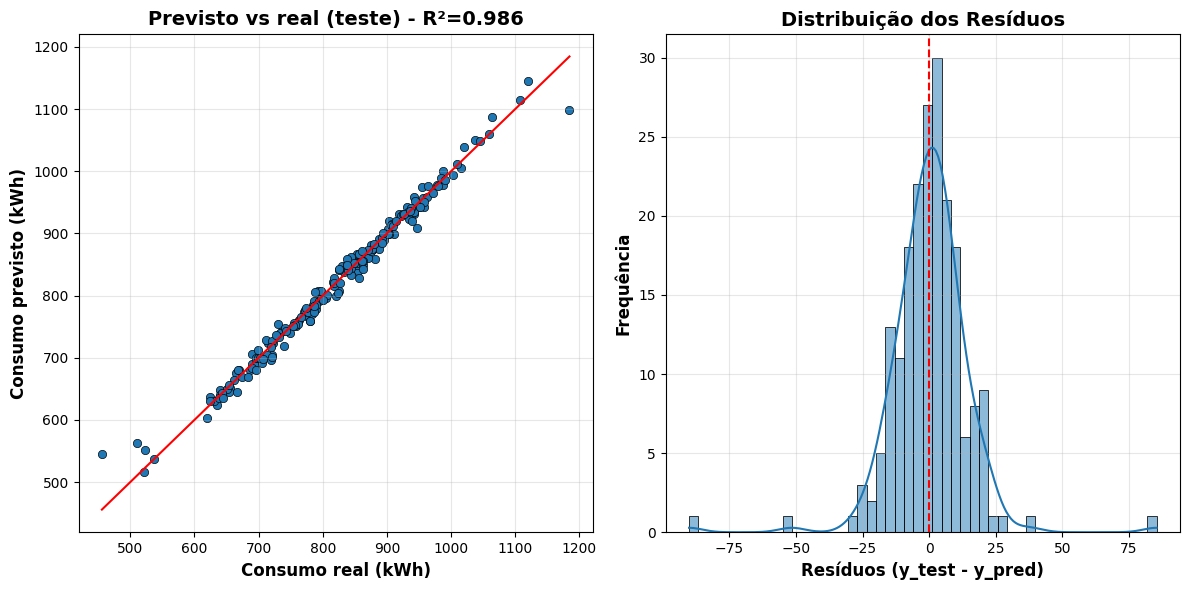

In [27]:
residuo_teste = y_teste - y_pred_teste # Residuo: Valores reais - valores previsto

plt.figure(figsize=(12, 6))
y_min = y_teste.min()
y_max = y_teste.max()

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_teste, y=y_pred_teste, edgecolor="k")
plt.plot([y_min, y_max], [y_min, y_max], color="red") # Reta y=x
plt.xlabel("Consumo real (kWh)", fontsize=12, fontweight='bold')
plt.ylabel("Consumo previsto (kWh)", fontsize=12, fontweight='bold')
plt.title(f"Previsto vs real (teste) - R²={r2_score(y_teste, y_pred_teste):.3f}", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)


plt.subplot(1, 2, 2)
sns.histplot(residuo_teste, bins=50, kde = True, edgecolor="k")
plt.axvline(0, color="r", linestyle="--")
plt.title("Distribuição dos Resíduos", fontsize=14, fontweight='bold')
plt.xlabel("Resíduos (y_test - y_pred)", fontsize=12, fontweight='bold')
plt.ylabel("Frequência", fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### Discussão

- O gráfico de **previstos vs. reais** mostra pontos muito próximos da reta $y = x$, indicando excelente ajuste e alta capacidade do modelo em reproduzir o consumo observado (R² = 0,986).
​

- O histograma dos resíduos é aproximadamente simétrico em torno de zero, com poucos extremos, sugerindo erros sem viés sistemático.


# Passo 7: 🔍 Modelo 2 – Regressão Linear Refinada (Seleção de Variáveis)

Neste modelo, refazemos **todo o fluxo de modelagem**, mas agora considerando apenas **as variáveis com relevância estatística** (ou seja, que apresentaram correlação significativa com o consumo de energia).

🎯 **Objetivos:**
- Reduzir o ruído do modelo, removendo variáveis irrelevantes;
- Avaliar se o desempenho melhora com um conjunto mais enxuto;
- Comparar resultados com o Modelo 1 em termos de coeficientes, métricas e resíduos.

---

## 🔄 Transformações Temporais
As variáveis de tempo foram transformadas para **representar ciclos de forma contínua**:

⏰ `Hora_Dia` ➜ `Hora_sin` e `Hora_cos`  
📅 `Dia_Semana` ➜ `Dia_sin` e `Dia_cos`  

Isso preserva a periodicidade e permite ao modelo entender relações como variações diárias e semanais do consumo.

---

## 🧩 Preparação dos Dados e Treino

- Divisão em **treino (80%)** e **teste (20%)**;  
- Padronização das variáveis numéricas (**média 0, desvio 1**) usando `StandardScaler`;  
- Conversão de arrays NumPy de volta para DataFrame para facilitar análises e visualizações.

---

## 📈 Ajuste do Modelo e Previsões

- Ajuste da **regressão linear** no conjunto de treino;  
- Geração de previsões no conjunto de teste;  
- Verificação de **capacidade de generalização** do modelo.

---

## 📊 Análise dos Coeficientes

- Avaliação do **sinal e magnitude** de cada coeficiente;  
- Comparação da **importância relativa** das variáveis padronizadas;  
- Identificação de fatores com maior impacto sobre o consumo de energia.

---

## 📐 Métricas de Desempenho

- **R²:** proporção da variabilidade explicada pelo modelo;  
- **RMSE:** erro médio quadrático, penalizando grandes discrepâncias;  
- **MAE:** erro médio absoluto, indicando o desvio médio das previsões em kWh.  

As métricas são calculadas para **treino e teste**, permitindo analisar consistência e risco de overfitting.

---

## 📉 Resíduos: Previsto vs Real

- Gráfico de resíduos para verificar **padrões não capturados pelo modelo**;  
- Avaliação visual da distribuição dos erros;  
- Confirmação de aleatoriedade e ausência de viés sistemático.

---

## 🔄 Comparativo Modelo 1 × Modelo 2

Após a execução completa, realiza-se a **comparação entre os dois modelos**, considerando:  
- Coeficientes e interpretabilidade;  
- Métricas de desempenho (R², RMSE, MAE);  
- Distribuição dos resíduos.  

💡 **Objetivo:** identificar se a seleção de variáveis trouxe **melhoria na robustez, previsibilidade e simplicidade do modelo**.

---

In [28]:
df_final = df_ajustado.drop(columns=[
    'Dia_sin', 'Dia_cos',
    'Hora_sin', 'Hora_cos',
    'Sensor_Ruido_1',
    'Sensor_Ruido_2',
    'Sensor_Constante',
    'Sensor_Tempo_Ruido'
])
df_final.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Consumo_Energia_kWh      1000 non-null   float64
 1   Temperatura_Ambiente_C   1000 non-null   float64
 2   Umidade_Ar_Percent       1000 non-null   float64
 3   Velocidade_Producao_RPM  1000 non-null   float64
 4   Pressao_Sistema_Bar      1000 non-null   float64
dtypes: float64(5)
memory usage: 39.2 KB


In [29]:
X = df_final.drop(columns=[variavel_alvo]).select_dtypes(include="number")
y = df_final[variavel_alvo]

X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)

print("Tamanho treino:", X_treino.shape, "| Tamanho teste:", X_teste.shape)

Tamanho treino: (800, 4) | Tamanho teste: (200, 4)


In [30]:
scaler = StandardScaler()
X_treino_padronizado = scaler.fit_transform(X_treino)
X_teste_padronizado = scaler.transform(X_teste)

# Volta para DataFrame (mantém nomes das variáveis)
X_treino_padronizado = pd.DataFrame(X_treino_padronizado, columns = X_treino.columns, index = X_treino.index)
X_teste_padronizado = pd.DataFrame(X_teste_padronizado, columns = X_teste.columns, index = X_teste.index)

In [31]:
#Treino do modelo
modelo = LinearRegression()
modelo.fit(X_treino_padronizado, y_treino)

# Previsões
y_pred_treino = modelo.predict(X_treino_padronizado)
y_pred_teste = modelo.predict(X_teste_padronizado)


Coeficientes do modelo (ordenados por |coef|):
               Variavel    Coef
Velocidade_Producao_RPM 117.072
 Temperatura_Ambiente_C  19.578
     Umidade_Ar_Percent  17.923
    Pressao_Sistema_Bar  15.255


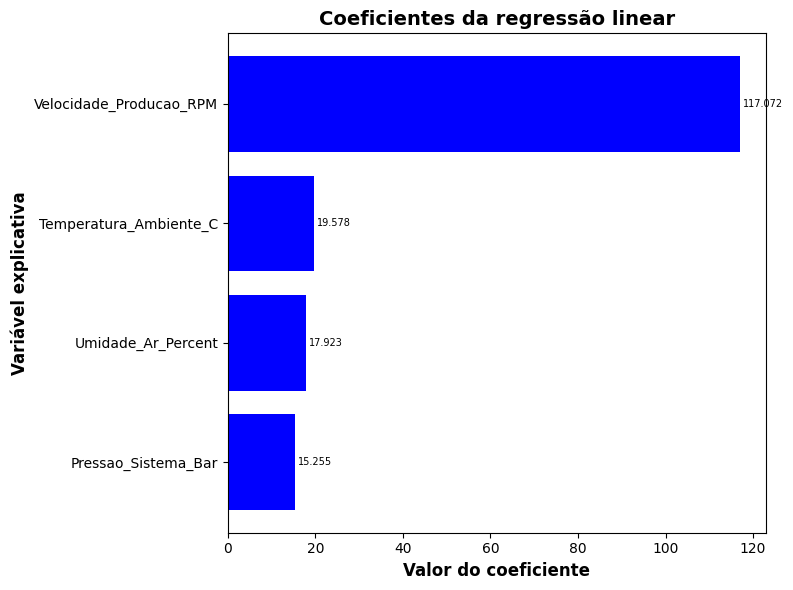

In [32]:
coef_df = pd.DataFrame({"Variavel": X_treino_padronizado.columns, "Coef": modelo.coef_})
coef_df_sorted = coef_df.sort_values(by="Coef", key=np.abs, ascending=False)

print("\nCoeficientes do modelo (ordenados por |coef|):")
print(coef_df_sorted.to_string(index=False))

plt.figure(figsize=(8, 6))
cores = ["red" if c < 0 else "blue" for c in coef_df_sorted["Coef"]]
bars = plt.barh(coef_df_sorted["Variavel"], coef_df_sorted["Coef"], color=cores)
plt.xlabel("Valor do coeficiente", fontsize=12, fontweight="bold")
plt.ylabel("Variável explicativa", fontsize=12, fontweight="bold")
plt.title("Coeficientes da regressão linear", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()

for bar in bars:
    valor = bar.get_width()
    plt.text(
        valor + 0.7,
        bar.get_y() + bar.get_height() / 2,
        f"{valor:.3f}",
        va="center",
        ha="left",
        fontsize=7,
    )
plt.tight_layout()
plt.show()

### Discussão:

Mesmo comportamento observado no modelo completo.

In [33]:
print("\nDesempenho do Modelo:")

# ===== TREINO =====
r2_treino = r2_score(y_treino, y_pred_treino)
rmse_treino = np.sqrt(mean_squared_error(y_treino, y_pred_treino))
mae_treino = mean_absolute_error(y_treino, y_pred_treino)

print("\n--- TREINO ---")
print(f"R²   : {r2_treino:.3f}")
print(f"RMSE : {rmse_treino:.3f}")
print(f"MAE  : {mae_treino:.3f}")

# ===== TESTE =====
r2_teste = r2_score(y_teste, y_pred_teste)
rmse_teste = np.sqrt(mean_squared_error(y_teste, y_pred_teste))
mae_teste = mean_absolute_error(y_teste, y_pred_teste)

print("\n--- TESTE ---")
print(f"R²   : {r2_teste:.3f}")
print(f"RMSE : {rmse_teste:.3f}")
print(f"MAE  : {mae_teste:.3f}")


Desempenho do Modelo:

--- TREINO ---
R²   : 0.988
RMSE : 13.659
MAE  : 9.152

--- TESTE ---
R²   : 0.986
RMSE : 14.444
MAE  : 9.596


### Comparação: Modelo 1 vs. Modelo 2

| Métrica | Modelo 1 (Treino) | Modelo 1 (Teste) | Modelo 2 (Treino) | Modelo 2 (Teste) |
|--------|-------------------|------------------|-------------------|------------------|
| R²     | 0.989             | 0.986            | 0.988             | 0.986            |
| RMSE  | 13.081            | 14.401           | 13.659            | 14.444           |
| MAE   | 8.785             | 9.524            | 9.152             | 9.596            |


Mesmo com a remoção das variáveis, o Modelo 2 mantém desempenho praticamente idêntico ao Modelo 1.

Isso indica que as variáveis removidas tinham baixo poder explicativo.

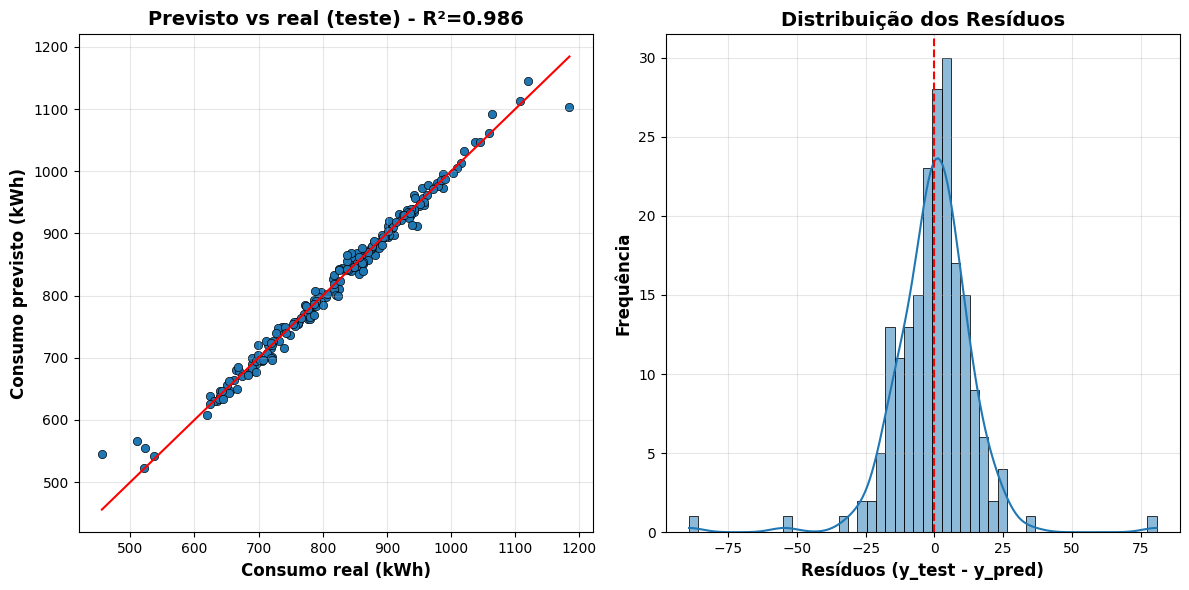

In [34]:
residuo_teste = y_teste - y_pred_teste # Residuo: Valores reais - valores previsto

plt.figure(figsize=(12, 6))
y_min = y_teste.min()
y_max = y_teste.max()

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_teste, y=y_pred_teste, edgecolor="k")
plt.plot([y_min, y_max], [y_min, y_max], color="red") # Reta y=x
plt.xlabel("Consumo real (kWh)", fontsize=12, fontweight='bold')
plt.ylabel("Consumo previsto (kWh)", fontsize=12, fontweight='bold')
plt.title(f"Previsto vs real (teste) - R²={r2_score(y_teste, y_pred_teste):.3f}", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)


plt.subplot(1, 2, 2)
sns.histplot(residuo_teste, bins=50, kde = True, edgecolor="k")
plt.axvline(0, color="r", linestyle="--")
plt.title("Distribuição dos Resíduos", fontsize=14, fontweight='bold')
plt.xlabel("Resíduos (y_test - y_pred)", fontsize=12, fontweight='bold')
plt.ylabel("Frequência", fontsize=12, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# PASSO 8 — Aplicação: Previsão para Novos Dados

Neste passo, aplicamos o **modelo 2 de regressão linear** para estimar o consumo de energia em um **cenário hipotético**, baseado na **média de todas as variáveis explicativas originais**.

---

## 🧪 Definição do Cenário
- O cenário considera o **valor médio** de cada variável explicativa, representando uma **operação típica da indústria**;
- Essa abordagem permite testar a previsão do modelo em uma situação “média”, sem valores extremos ou outliers.

---

## 🔄 Pré-processamento
Antes de fazer a previsão, o cenário precisa ser **padronizado** utilizando **o mesmo scaler usado no treino**:

1. Padronização com `StandardScaler` (média 0, desvio 1);  
2. Conversão do array NumPy de volta para **DataFrame**, mantendo nomes das colunas;  
3. Seleção apenas das **colunas usadas no modelo 2** (excluindo variáveis irrelevantes, como sensores redundantes).

---

## 📈 Previsão com o Modelo 2
- Aplicamos o **modelo de regressão linear 2** ao cenário preparado;  
- O resultado fornece uma **estimativa do consumo de energia (kWh)** para esse conjunto de condições médias.

---



In [35]:
# Cenário: média de TODAS as variaveis explicativas originais
cenario_array = X.mean().values.reshape(1, -1)
cenario_df = pd.DataFrame(cenario_array, columns=X.columns)

print("\nCenário médio de operação (novos dados de entrada):")
display(cenario_df.round(3))

# Padronizando com o mesmo scaler do treino
cenario_padronizado = scaler.transform(cenario_array)
cenario_padronizado = pd.DataFrame(cenario_padronizado, columns=X.columns)


# Selecionando apenas as colunas usadas no modelo final (sem Sensor_Redundante)
cenario_final = cenario_padronizado[X_treino.columns]

#Previsão com o modelo final ajustado  (sem Sensor_Redundante)
previsao = modelo.predict(cenario_final)[0]

print("\nPrevisão do consumo de energia para esse cenário:")
print(f"Consumo de Energia previsto é de {previsao:.3f} kWh")


Cenário médio de operação (novos dados de entrada):


,Temperatura_Ambiente_C,Umidade_Ar_Percent,Velocidade_Producao_RPM,Pressao_Sistema_Bar
0,25.154,61.058,500.731,59.821



Previsão do consumo de energia para esse cenário:
Consumo de Energia previsto é de 828.681 kWh


### Discussão do resultado:
Esse valor está bem coerente com o comportamento global da base: a média observada do consumo de energia é de 828,651 kWh, então uma previsão de  828,586 kWh para o cenário médio das variáveis explicativas faz sentido e reforça que o modelo está calibrado em torno do padrão típico de operação.


# 🏁 Conclusão Final

Do ponto de vista **estatístico**, o **modelo final de regressão linear** atendeu às principais suposições da técnica:

- A análise dos **resíduos** indicou distribuição aproximadamente normal, sem padrões estruturais relevantes, reforçando a adequação do ajuste realizado.
- A **multicolinearidade**, inicialmente presente em `Pressao_Sistema_Bar` e `Sensor_Redundante` (VIF elevado), foi resolvida após a remoção do **Sensor_Redundante**, com todos os VIFs próximos de 1, garantindo **coeficientes mais estáveis**.

---

## 📊 Comparação Modelo Completo × Modelo Reduzido

- A **remoção de variáveis com baixa correlação** não comprometeu o desempenho preditivo: métricas no conjunto de teste permaneceram praticamente inalteradas.  
- Houve **ganho em interpretabilidade e robustez estatística**, pois os coeficientes passaram a refletir de forma mais direta o efeito das variáveis operacionais relevantes.

---

## ⚡ Principais Insights Operacionais

- A variável **Velocidade de Produção** é o principal fator que influencia o consumo de energia (kWh);  
- Outros sensores redundantes ou de baixa correlação foram eliminados, simplificando o modelo sem perda de desempenho.

---

## ✅ Conclusão

O **modelo final** apresenta:

- Excelente **desempenho preditivo**;  
- **Menor complexidade** e maior **robustez estatística**;  
- **Interpretabilidade aprimorada**, refletindo relações reais entre variáveis operacionais e consumo de energia;  
- **Consistência com os pressupostos da regressão linear**, tornando-o adequado para **previsão e planejamento energético**.


---
